In [1]:
from feature_writer.utils import create_dataset
from feature_writer.pump_feature_writer import REGRESSOR_OFFSETS, DECAY_OFFSETS
from core.feature_type import FeatureType

from tqdm import tqdm
from typing import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load data from pumps/cross_sections
df: pd.DataFrame = create_dataset()
df["is_pumped"] = df["currency_pair"] == df["pumped_currency_pair"] # create bool column is_pumped

2025-08-14 15:21:38,675 | INFO | root | No cross section found for pump AAPC-BTC-BINANCE_SPOT-2020-11-18T18-00-11
2025-08-14 15:21:42,789 | INFO | root | No cross section found for pump BRX-BTC-BINANCE_SPOT-2019-04-04T20-00-02
2025-08-14 15:21:43,212 | INFO | root | No cross section found for pump CRACK-BTC-BINANCE_SPOT-2021-08-07T12-00-24
2025-08-14 15:21:43,213 | INFO | root | No cross section found for pump CREA-BTC-BINANCE_SPOT-2021-07-28T12-00-09
2025-08-14 15:21:43,214 | INFO | root | No cross section found for pump CRUMB-BTC-BINANCE_SPOT-2021-07-26T12-00-09
2025-08-14 15:21:43,215 | INFO | root | No cross section found for pump CTCX-BTC-BINANCE_SPOT-2020-06-03T16-00-12
2025-08-14 15:21:43,459 | INFO | root | No cross section found for pump CURE-BTC-BINANCE_SPOT-2019-03-19T20-01-23
2025-08-14 15:21:43,940 | INFO | root | No cross section found for pump DLT-BTC-BINANCE_SPOT-2021-05-01T17-00-08
2025-08-14 15:21:43,949 | INFO | root | No cross section found for pump DLT-BTC-BINANCE_

In [2]:
# Overall we have data for 465 pumps
df["pump_hash"].nunique()

462

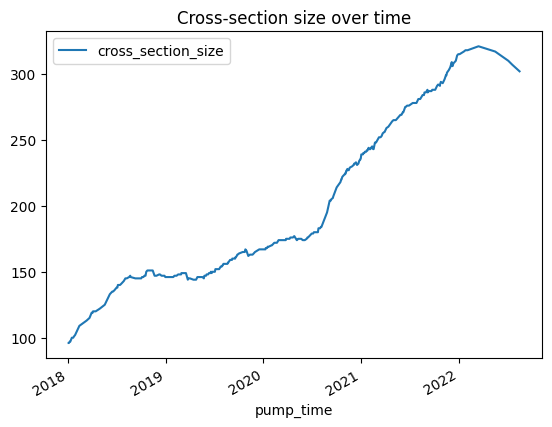

In [3]:
# cross-section statistics
(
    df.groupby("pump_hash")
    .agg(
        pump_time=("pump_time", "first"),
        cross_section_size=("pump_time", "count")
    )
    .sort_values(by="pump_time", ascending=True)
    .plot(x="pump_time", y="cross_section_size", title="Cross-section size over time")
)
plt.show()

<h4>Feature distributions and cross-sectional standardisation</h4>

In [4]:
import warnings 

warnings.filterwarnings("ignore", category=RuntimeWarning)

<p>Now we will go through each FeatureType and display distribution stats and fix gaps in data</p>

<h4>Powerlaw features</h4>

In [5]:
powerlaw_cols: List[str] = FeatureType.POWERLAW_ALPHA.col_names(offsets=REGRESSOR_OFFSETS)
df[powerlaw_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
powerlaw_alpha@5MIN,80306.0,inf,NaN,-9.007199e+15,1.287415,1.425417,1.821820,inf
powerlaw_alpha@15MIN,87406.0,inf,NaN,-9.007199e+15,1.239592,1.324240,1.465505,inf
powerlaw_alpha@1H,89180.0,inf,NaN,1.087056e+00,1.198927,1.255360,1.331763,inf
powerlaw_alpha@2H,89225.0,inf,NaN,1.083316e+00,1.182786,1.231580,1.296102,inf
powerlaw_alpha@4H,89239.0,inf,NaN,1.087441e+00,1.168515,1.212503,1.266645,inf
powerlaw_alpha@12H,89260.0,1.203982,0.080114,1.085992e+00,1.153649,1.191143,1.234534,4.958618
powerlaw_alpha@1D,89263.0,1.191799,0.069135,1.084541e+00,1.147210,1.179919,1.219990,4.713602
powerlaw_alpha@2D,89312.0,1.181493,0.061430,1.042519e+00,1.141692,1.170869,1.208006,4.552822
powerlaw_alpha@7D,89478.0,1.168125,0.048390,1.041700e+00,1.134207,1.158980,1.192602,2.326308
powerlaw_alpha@14D,89650.0,1.162593,0.044167,1.041700e+00,1.130763,1.154201,1.186198,2.035152


In [6]:
# clip pawerlaw features to range [1, 2]
df[powerlaw_cols] = df[powerlaw_cols].clip(1, 2)
df[powerlaw_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
powerlaw_alpha@5MIN,80306.0,1.532792,0.296734,1.000000,1.287415,1.425417,1.821820,2.0
powerlaw_alpha@15MIN,87406.0,1.399029,0.234218,1.000000,1.239592,1.324240,1.465505,2.0
powerlaw_alpha@1H,89180.0,1.282994,0.132534,1.087056,1.198927,1.255360,1.331763,2.0
powerlaw_alpha@2H,89225.0,1.251020,0.103819,1.083316,1.182786,1.231580,1.296102,2.0
powerlaw_alpha@4H,89239.0,1.228010,0.088896,1.087441,1.168515,1.212503,1.266645,2.0
powerlaw_alpha@12H,89260.0,1.203709,0.074808,1.085992,1.153649,1.191143,1.234534,2.0
powerlaw_alpha@1D,89263.0,1.191677,0.066445,1.084541,1.147210,1.179919,1.219990,2.0
powerlaw_alpha@2D,89312.0,1.181384,0.058665,1.042519,1.141692,1.170869,1.208006,2.0
powerlaw_alpha@7D,89478.0,1.168117,0.048224,1.041700,1.134207,1.158980,1.192602,2.0
powerlaw_alpha@14D,89650.0,1.162592,0.044153,1.041700,1.130763,1.154201,1.186198,2.0


In [7]:
df[powerlaw_cols].isna().sum()

powerlaw_alpha@5MIN     9701
powerlaw_alpha@15MIN    2601
powerlaw_alpha@1H        827
powerlaw_alpha@2H        782
powerlaw_alpha@4H        768
powerlaw_alpha@12H       747
powerlaw_alpha@1D        744
powerlaw_alpha@2D        695
powerlaw_alpha@7D        529
powerlaw_alpha@14D       357
dtype: int64

In [8]:
df[powerlaw_cols] = df[powerlaw_cols].fillna(-1)

<h4>Asset return features</h4>

<p><b>Note: returns are measured in pips</b></p>
<p>Here we observe that anticipated behaviour as time window grows the min/max and std become higher in absolute terms</p>

In [9]:
asset_return_cols: List[str] = FeatureType.ASSET_RETURN.col_names(offsets=REGRESSOR_OFFSETS)
df[asset_return_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
asset_return@5MIN,80305.0,3.521058,143.315842,-3333.333333,-19.011407,0.000000,20.632737,7000.000000
asset_return@15MIN,87405.0,5.138344,168.468121,-3333.333333,-30.959752,0.000000,34.619189,7000.000000
asset_return@1H,89178.0,7.064523,232.633949,-3528.125000,-65.776917,0.000000,63.291139,7288.135593
asset_return@2H,89218.0,7.721121,290.290103,-5000.000000,-96.038415,0.000000,82.987552,12371.541502
asset_return@4H,89224.0,20.520157,365.661945,-3875.968992,-125.790200,0.000000,123.057992,12549.800797
asset_return@12H,89203.0,33.141127,678.630180,-6392.125806,-211.712774,0.000000,200.382550,119032.258065
asset_return@1D,89188.0,29.181869,874.864992,-4814.814815,-334.417649,-27.932961,267.168850,119032.258065
asset_return@2D,89157.0,-0.606568,1179.017559,-6050.000000,-506.963788,-77.493817,326.409496,119032.258065
asset_return@7D,88568.0,-2.267576,4328.170881,-9999.946672,-1076.192516,-234.024282,589.812332,979361.702128
asset_return@14D,87920.0,69.640246,6586.149815,-9999.952116,-1590.909091,-399.045848,869.565217,979361.702128


In [10]:
df[asset_return_cols].isna().sum()

asset_return@5MIN     9702
asset_return@15MIN    2602
asset_return@1H        829
asset_return@2H        789
asset_return@4H        783
asset_return@12H       804
asset_return@1D        819
asset_return@2D        850
asset_return@7D       1439
asset_return@14D      2087
dtype: int64

<h4>Asset return zscores</h4>

In [11]:
asset_return_zscore_cols: List[str] = FeatureType.ASSET_RETURN_ZSCORE.col_names(offsets=REGRESSOR_OFFSETS)
df[asset_return_zscore_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
asset_return_zscore@5MIN,78265.0,0.068981,1.230802,-14.091035,-0.463561,0.000000,0.452541,25.383653
asset_return_zscore@15MIN,78265.0,0.068981,1.230802,-14.091035,-0.463561,0.000000,0.452541,25.383653
asset_return_zscore@1H,89210.0,0.063643,1.008898,-14.091035,-0.381431,0.000000,0.397003,20.413539
asset_return_zscore@2H,89234.0,0.044041,0.733591,-7.602639,-0.299965,0.000000,0.301036,13.955420
asset_return_zscore@4H,89239.0,0.040716,0.542228,-6.030088,-0.219881,0.000844,0.229707,13.955420
asset_return_zscore@12H,89259.0,0.023716,0.301608,-2.251391,-0.124513,0.001089,0.137365,6.795124
asset_return_zscore@1D,89262.0,0.008138,0.194260,-1.767127,-0.097865,-0.006029,0.095537,1.892111
asset_return_zscore@2D,89309.0,-0.001145,0.136099,-2.123060,-0.075240,-0.007412,0.063801,4.823023
asset_return_zscore@7D,89472.0,-0.003284,0.081295,-2.123060,-0.046442,-0.004311,0.038318,4.974488
asset_return_zscore@14D,89641.0,-0.002449,0.061733,-2.308614,-0.035120,-0.002283,0.030212,4.972071


<h4>Quote abs zscore</h4>

In [12]:
quote_abs_zscore_cols: List[str] = FeatureType.QUOTE_ABS_ZSCORE.col_names(offsets=REGRESSOR_OFFSETS)
df[quote_abs_zscore_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
quote_abs_zscore@5MIN,78265.0,0.715917,1.351440,0.000032,0.125225,0.324642,0.777124,26.408984
quote_abs_zscore@15MIN,78265.0,0.715917,1.351440,0.000032,0.125225,0.324642,0.777124,26.408984
quote_abs_zscore@1H,89210.0,0.710061,1.228292,0.000011,0.138922,0.342063,0.796723,26.408984
quote_abs_zscore@2H,89234.0,0.694073,1.051828,0.000035,0.153419,0.359939,0.806171,17.311744
quote_abs_zscore@4H,89239.0,0.678812,0.909874,0.000124,0.168093,0.379069,0.816562,11.531047
quote_abs_zscore@12H,89259.0,0.608599,0.681840,0.000598,0.177134,0.381639,0.774643,7.441625
quote_abs_zscore@1D,89262.0,0.576452,0.584067,0.000713,0.183932,0.384659,0.755697,5.185480
quote_abs_zscore@2D,89309.0,0.572972,0.510987,0.000392,0.206937,0.414597,0.777331,5.133345
quote_abs_zscore@7D,89472.0,0.572750,0.399405,0.000392,0.273251,0.486858,0.783629,4.978211
quote_abs_zscore@14D,89641.0,0.573620,0.351189,0.000481,0.321655,0.511206,0.763937,4.978211


<h4>Share of long trades</h4>

In [13]:
share_of_long_trades_cols: List[str] = FeatureType.SHARE_OF_LONG_TRADES.col_names(offsets=REGRESSOR_OFFSETS)
df[share_of_long_trades_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
share_of_long_trades@5MIN,80306.0,0.517494,0.293557,0.000000,0.333333,0.500000,0.714286,1.000000
share_of_long_trades@15MIN,87406.0,0.518737,0.225703,0.000000,0.388889,0.517857,0.666667,1.000000
share_of_long_trades@1H,89180.0,0.517066,0.150933,0.000000,0.432624,0.517241,0.604167,1.000000
share_of_long_trades@2H,89225.0,0.516037,0.124867,0.000000,0.447028,0.515789,0.586364,1.000000
share_of_long_trades@4H,89239.0,0.517512,0.106614,0.000000,0.460371,0.515971,0.574613,1.000000
share_of_long_trades@12H,89260.0,0.518353,0.090800,0.000000,0.472882,0.516047,0.562500,0.995282
share_of_long_trades@1D,89263.0,0.519985,0.080865,0.028927,0.481348,0.516484,0.555556,0.993056
share_of_long_trades@2D,89312.0,0.521062,0.072940,0.047204,0.486837,0.516129,0.550529,0.989017
share_of_long_trades@7D,89478.0,0.523131,0.064349,0.083655,0.494091,0.516945,0.545792,0.976714
share_of_long_trades@14D,89650.0,0.525076,0.060389,0.093449,0.497276,0.517729,0.545213,0.962848


<h4>Slippage imbalance</h4>

In [14]:
slippage_imbalance_cols: List[str] = FeatureType.SLIPPAGE_IMBALANCE.col_names(offsets=REGRESSOR_OFFSETS)
df[slippage_imbalance_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
slippage_imbalance@5MIN,50007.0,-0.044850,0.894662,-1.0,-1.000000,-0.199395,1.000000,1.0
slippage_imbalance@15MIN,69048.0,-0.062563,0.840231,-1.0,-0.992776,-0.184824,0.939394,1.0
slippage_imbalance@1H,83734.0,-0.104630,0.737283,-1.0,-0.854666,-0.202818,0.622000,1.0
slippage_imbalance@2H,86655.0,-0.119204,0.674492,-1.0,-0.757683,-0.189830,0.469712,1.0
slippage_imbalance@4H,88056.0,-0.122843,0.613601,-1.0,-0.661228,-0.174902,0.362366,1.0
slippage_imbalance@12H,88905.0,-0.128473,0.530225,-1.0,-0.534946,-0.157998,0.237167,1.0
slippage_imbalance@1D,89138.0,-0.130880,0.479579,-1.0,-0.469520,-0.154029,0.175906,1.0
slippage_imbalance@2D,89276.0,-0.129857,0.425964,-1.0,-0.403855,-0.144546,0.120081,1.0
slippage_imbalance@7D,89476.0,-0.109862,0.342145,-1.0,-0.300838,-0.121724,0.069047,1.0
slippage_imbalance@14D,89650.0,-0.099632,0.304101,-1.0,-0.259787,-0.111684,0.052987,1.0


<h4>Flow imbalance</h4>

In [15]:
flow_imbalance_cols: List[str] = FeatureType.FLOW_IMBALANCE.col_names(offsets=REGRESSOR_OFFSETS)
df[flow_imbalance_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
flow_imbalance@5MIN,80306.0,-0.012776,0.705638,-1.000000,-0.682731,-0.019716,0.648792,1.000000
flow_imbalance@15MIN,87406.0,-0.029580,0.583498,-1.000000,-0.484156,-0.030987,0.407041,1.000000
flow_imbalance@1H,89180.0,-0.046499,0.413712,-1.000000,-0.310325,-0.043085,0.207877,1.000000
flow_imbalance@2H,89225.0,-0.051817,0.335561,-1.000000,-0.248605,-0.045318,0.140901,1.000000
flow_imbalance@4H,89239.0,-0.046209,0.271841,-1.000000,-0.195151,-0.039906,0.100664,1.000000
flow_imbalance@12H,89260.0,-0.040176,0.202532,-1.000000,-0.144360,-0.038056,0.058934,0.993480
flow_imbalance@1D,89263.0,-0.034767,0.166776,-0.976580,-0.118106,-0.035689,0.039381,0.984582
flow_imbalance@2D,89312.0,-0.032044,0.139417,-0.976174,-0.100852,-0.035991,0.024525,0.967960
flow_imbalance@7D,89478.0,-0.023789,0.107798,-0.958871,-0.077504,-0.031820,0.012232,0.932742
flow_imbalance@14D,89650.0,-0.018793,0.097237,-0.895483,-0.068476,-0.028723,0.010769,0.907893


<h4>Num trades</h4>

In [16]:
num_trades_cols: List[str] = FeatureType.NUM_TRADES.col_names(offsets=REGRESSOR_OFFSETS)
df[num_trades_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_trades@5MIN,90007.0,31.848845,100.489788,0.0,2.0,8.0,24.0,4987.0
num_trades@15MIN,90007.0,95.090071,276.301447,0.0,9.0,27.0,76.0,12184.0
num_trades@1H,90007.0,392.769074,1062.967554,0.0,47.0,121.0,327.0,33566.0
num_trades@2H,90007.0,780.666959,2101.053474,0.0,100.0,250.0,660.0,88326.0
num_trades@4H,90007.0,1535.448621,4014.717845,0.0,211.0,511.0,1333.0,137259.0
num_trades@12H,90007.0,4276.818725,10895.082268,0.0,629.0,1501.0,3787.0,437471.0
num_trades@1D,90007.0,8391.718944,21199.343437,0.0,1293.0,3012.0,7473.0,855882.0
num_trades@2D,90007.0,16816.931050,41132.268941,0.0,2762.0,6300.0,15189.5,1302688.0
num_trades@7D,90007.0,58858.110736,133725.317166,0.0,11155.0,23984.0,54756.5,3823480.0
num_trades@14D,90007.0,116028.039786,252291.882682,0.0,23871.0,49351.0,110534.5,6704862.0


<h4>Plot feature distributions before and after cross-sectional standardisation</h4>

$$X_{\text{std}} = \frac{X - \bar{X}}{\sigma_{X}}$$

In [17]:
# plot feature distributions before cross-sectional standardisation
cols_to_scale: List[str] = (
    asset_return_cols + asset_return_zscore_cols + quote_abs_zscore_cols + share_of_long_trades_cols +
    powerlaw_cols + slippage_imbalance_cols + flow_imbalance_cols + num_trades_cols
)

dfs: List[pd.DataFrame] = []

for pump_hash, df_cross_section in tqdm(df.groupby("pump_hash")):
    df_cross_section = df_cross_section.reset_index(drop=True)
    for col in cols_to_scale:
        df_cross_section[col] = (df_cross_section[col] - df_cross_section[col].mean()) / df_cross_section[col].std()
    dfs.append(df_cross_section)

df_scaled: pd.DataFrame = pd.concat(dfs)
df_scaled = df_scaled.reset_index(drop=True)
df_scaled.head(5)

100%|██████████| 462/462 [00:15<00:00, 29.17it/s]


,asset_return@5MIN,asset_return_zscore@5MIN,quote_abs_zscore@5MIN,share_of_long_trades@5MIN,powerlaw_alpha@5MIN,slippage_imbalance@5MIN,flow_imbalance@5MIN,num_trades@5MIN,asset_return@15MIN,asset_return_zscore@15MIN,...,target_return@1MIN,target_return@2MIN,target_return@3MIN,target_return@4MIN,target_return@5MIN,currency_pair,pump_hash,pump_time,pumped_currency_pair,is_pumped
0,-0.411596,-0.833701,0.108131,1.676849,0.785771,NaN,1.365911,-0.303697,0.176984,-0.833701,...,0.000000,3.053435,18.320611,18.320611,-15.267176,SFP-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
1,-0.331867,-0.022788,0.283144,-0.554793,0.150950,-1.059454,-0.604032,0.584233,-0.375468,-0.022788,...,13.568521,33.921303,47.489824,13.568521,0.000000,REN-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
2,0.049972,0.085598,-0.289551,-1.525073,0.785771,NaN,-1.218888,-0.364934,0.381706,0.085598,...,-11.659541,-11.659541,-11.659541,-11.659541,-11.659541,LPT-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
3,0.237778,-0.307071,-0.361742,0.762014,0.280836,NaN,-0.840570,0.002486,-0.076117,-0.307071,...,18.472906,18.472906,30.788177,12.315271,0.000000,OMG-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False
4,0.531119,-0.142429,-0.421824,0.396080,0.086852,0.721528,0.275827,-0.273079,1.473239,-0.142429,...,0.000000,19.762846,19.762846,19.762846,19.762846,OAX-BTC,ACM-BTC-BINANCE_SPOT-2021-06-05T18-00-13,2021-06-05 18:00:13,ACM-BTC,False


8it [00:03,  2.46it/s]


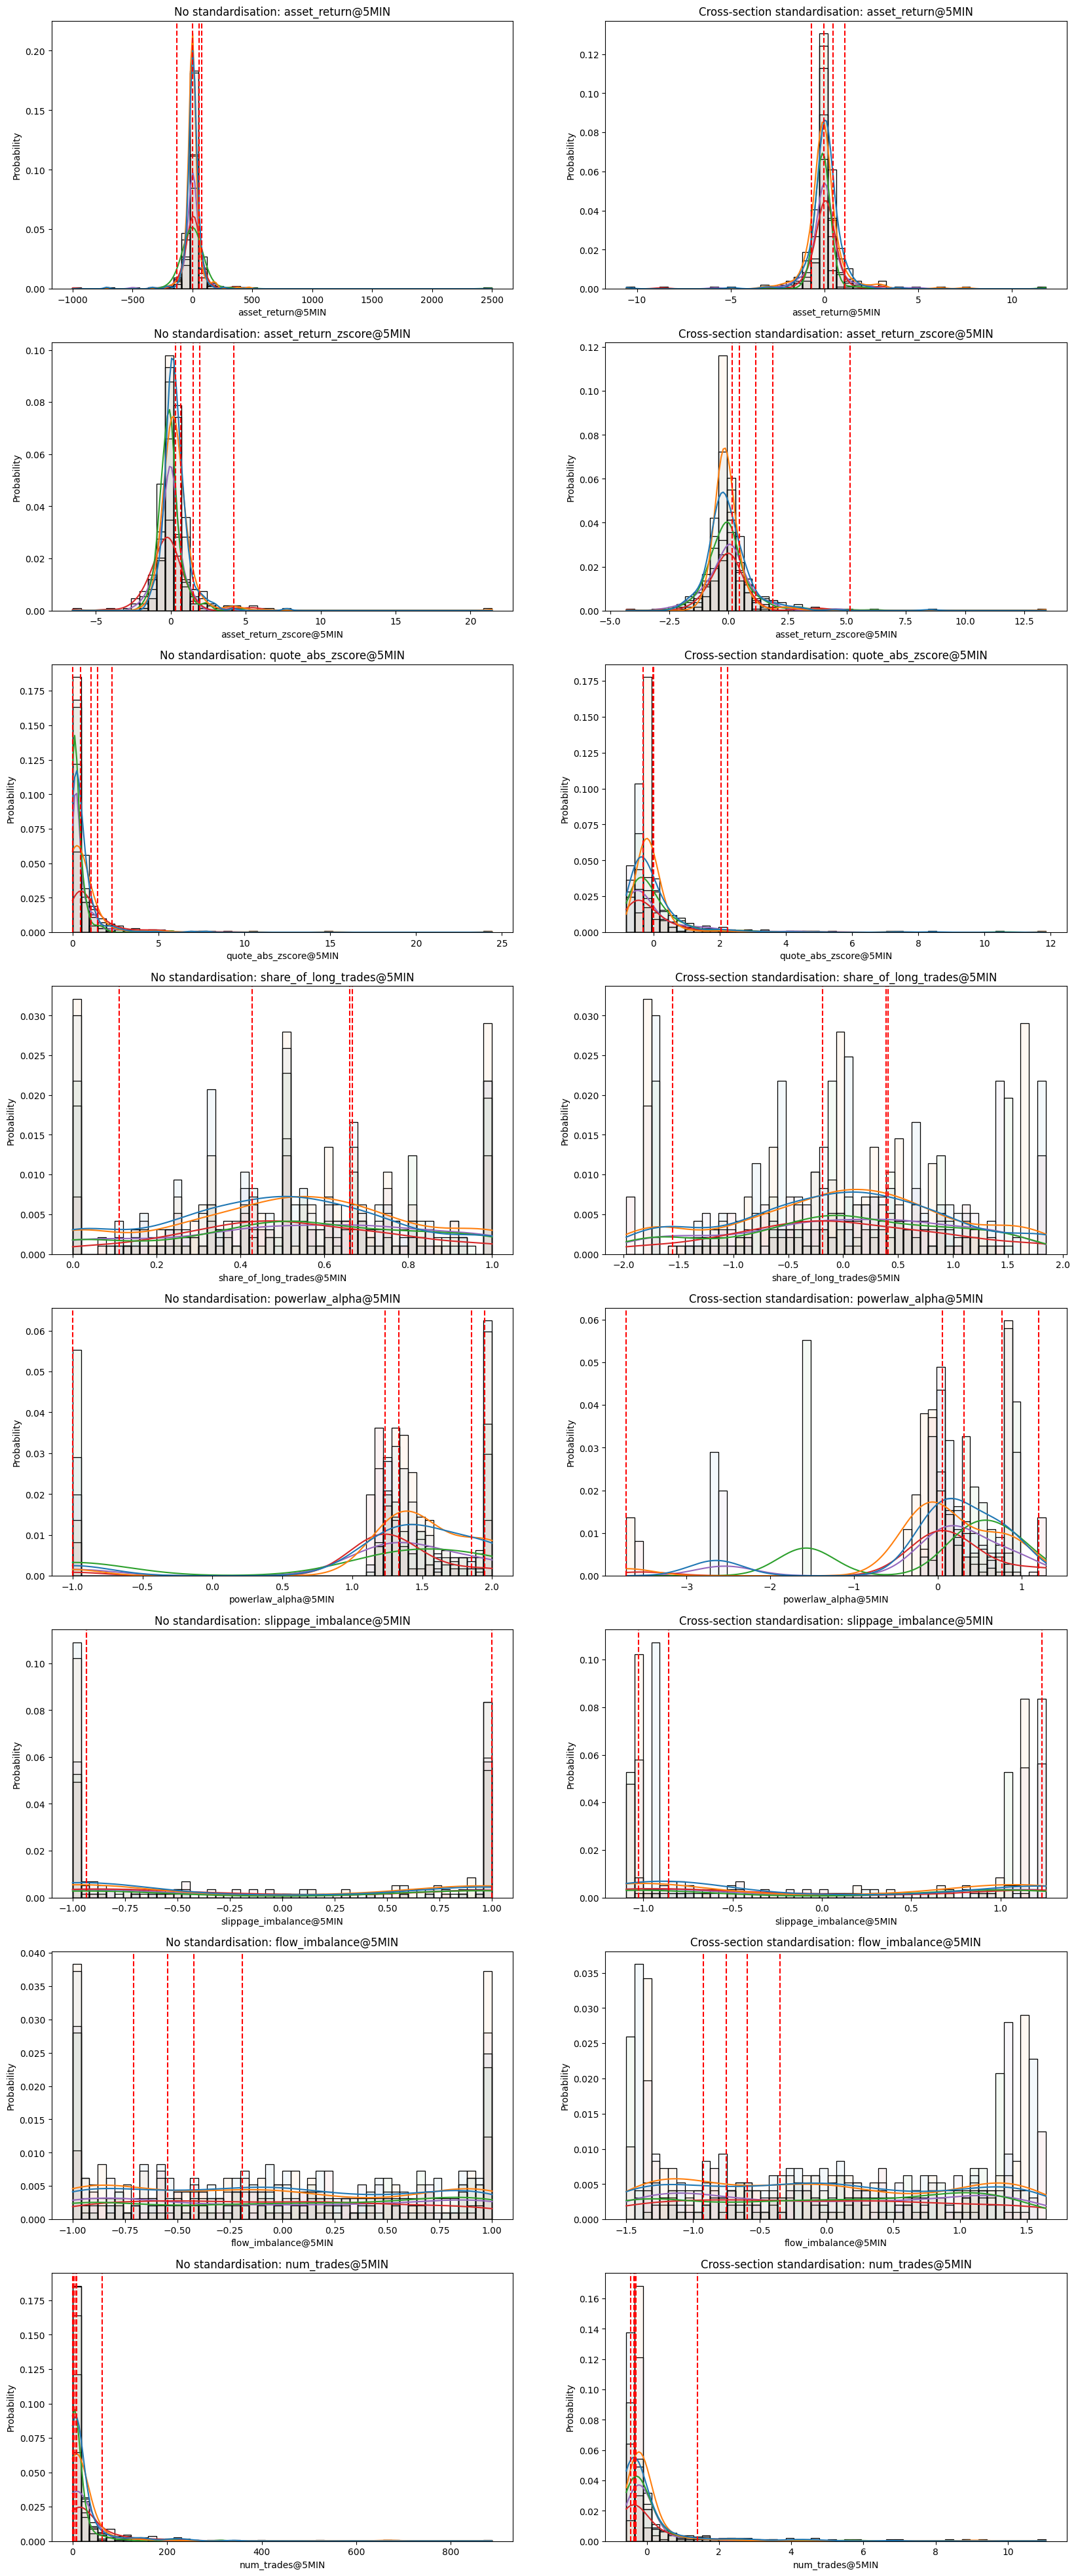

In [18]:
from core.time_utils import NamedTimeDelta
import seaborn as sns

fig, axs = plt.subplots(len(FeatureType), 2, figsize=(20, 50))
use_offset: NamedTimeDelta = NamedTimeDelta.FIVE_MINUTES

# create two smaller dataframes with less cross-sections to plot
selected_pump_hashes: np.array = np.random.choice(df["pump_hash"].unique(), 5, replace=False) # use 5 pumps for plotting
df_small: pd.DataFrame = df[df["pump_hash"].isin(selected_pump_hashes)]
df_scaled_small: pd.DataFrame = df_scaled[df_scaled["pump_hash"].isin(selected_pump_hashes)]

feature: FeatureType

for (ax1, ax2), feature in tqdm(zip(axs, list(FeatureType))):
    col_name: str = feature.col_name(offset=use_offset)
    # Plot pumps without standardisation
    sns.histplot(
        data=df_small,
        x=col_name,
        hue="pump_hash", 
        ax=ax1, legend=False, alpha=0.05, bins=50, kde=True, stat="probability"
    )
    ax1.set_title(f"No standardisation: {col_name}")
    for pump_hash in selected_pump_hashes:
        ax1.axvline(
            x=df_small.loc[df_small["is_pumped"] & (df_small["pump_hash"] == pump_hash), col_name].iloc[0], 
            color="red", linestyle="--"
        )
    
    sns.histplot(
        data=df_scaled_small,
        x=col_name,
        hue="pump_hash", 
        ax=ax2, legend=False, alpha=0.05, bins=50, kde=True, stat="probability"
    )
    ax2.set_title(f"Cross-section standardisation: {col_name}")
    for pump_hash in selected_pump_hashes:
        ax2.axvline(
            x=df_scaled_small.loc[df_scaled_small["is_pumped"] & (df_scaled_small["pump_hash"] == pump_hash), col_name].iloc[0], 
            color="red", linestyle="--"
        )

<h4>Split data and train the first model</h4>

In [19]:
from sklearn.model_selection import train_test_split

# Train/val/test split
df_train, df_val, df_test = (
    df_scaled[df_scaled["pump_time"] <= "2020-09-01"].copy(),  # train sample
    df_scaled[(df_scaled["pump_time"] > "2020-09-01") & (df_scaled["pump_time"] <= "2021-05-01")].copy(), # val sample
    df_scaled[df_scaled["pump_time"] > "2021-05-01"].copy(),  # test sample
)

# Sample statistics
pumps = np.array([df_train["is_pumped"].sum(), df_val["is_pumped"].sum(), df_test["is_pumped"].sum()])
overall_observations = np.array([df_train.shape[0], df_val.shape[0], df_test.shape[0]])
avg_cross = np.array([
    df_train.groupby("pump_hash")["currency_pair"].count().mean(), 
    df_val.groupby("pump_hash")["currency_pair"].count().mean(),
    df_test.groupby("pump_hash")["currency_pair"].count().mean()
])

df_cross_stats = pd.DataFrame({ 
    "Positive": pumps,
    "Negative": overall_observations - pumps,
    "Total": overall_observations,
    "Average Crosssection Size": avg_cross
}).T.round(1)

df_cross_stats.columns = ["Train", "Validation", "Test"]
df_cross_stats

,Train,Validation,Test
Positive,287.0,101.0,74.0
Negative,44142.0,23943.0,21460.0
Total,44429.0,24044.0,21534.0
Average Crosssection Size,154.8,238.1,291.0


In [20]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, auc

def plot_precision_recall(df: pd.DataFrame, model_probas: Dict[str, np.array], figsize: Tuple[int, int] = (10, 10)) -> None:
    """Plot Precision Recall curve for the model"""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    for model_name, y_proba in model_probas.items():
        precision, recall, _ = precision_recall_curve(y_true=df["is_pumped"], y_score=y_proba)
        PrecisionRecallDisplay(precision=precision, recall=recall).plot(
            ax=ax, label=f"PRAUC: {model_name} - {auc(recall, precision):.4f}"
        )

    f_scores = np.linspace(0.1, 0.8, num=10)

    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = ax.plot(x[y >= 0], y[y >= 0], color="blue", alpha=0.2)
        ax.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    plt.legend(loc="upper right")
    plt.title("Precision Recall curves")

<h4>Baseline Logistic Regression</h4>

In [21]:
mean_crosssection_size: int = df.groupby("pump_hash")["currency_pair"].count().mean()
print(f"Mean crosssection size across the whole dataset is {mean_crosssection_size:.3f}")

Mean crosssection size across the whole dataset is 194.820


In [22]:
# define regression columns and target
target: str = "is_pumped"
reg_cols: List[str] = (
    asset_return_cols + asset_return_zscore_cols + 
    quote_abs_zscore_cols + share_of_long_trades_cols +
    powerlaw_cols + slippage_imbalance_cols +
    flow_imbalance_cols + num_trades_cols
)

In [23]:
from sklearn.linear_model import LogisticRegression

# Train baseline Logistic Regression
model_lr = LogisticRegression(
    max_iter=int(1e10),
    class_weight={0: 1, 1: mean_crosssection_size},
)

# model_lr.fit(df_train[reg_cols], df_train[target])

# probas_pred_lr_val = model_lr.predict_proba(df_val[reg_cols])[:, 1]

In [24]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(
    criterion="gini",
    n_estimators=1000,
    max_depth=5,
    n_jobs=-1,
    max_samples=.8
)

model_rf.fit(X=df_train[reg_cols], y=df_train[target])

,n_estimators,1000
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


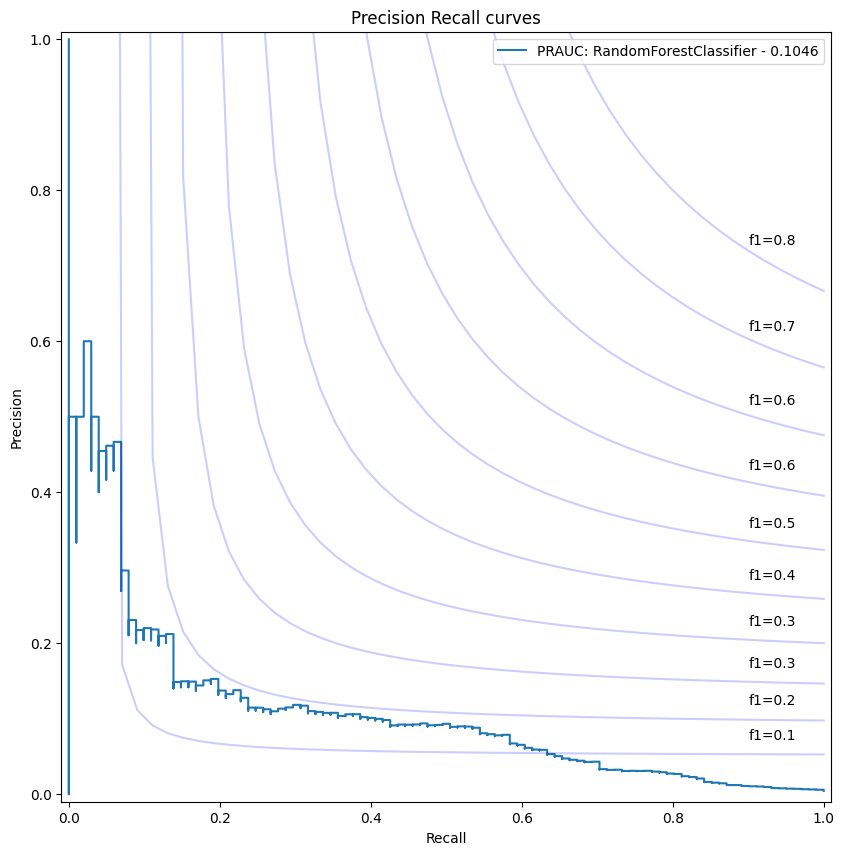

In [25]:
probas_pred_rf: np.ndarray = model_rf.predict_proba(df_val[reg_cols])[:, 1]

plot_precision_recall(df=df_val, model_probas={"RandomForestClassifier": probas_pred_rf})

In [26]:
def calculate_topk(df: pd.DataFrame, probas_pred: np.ndarray, topk_bins: List[int]) -> Dict[int, float]:
    df["probas_pred"] = probas_pred
    count_by_bins: Dict[int, int] = {}

    for pump_hash, df_cross_section in df.groupby("pump_hash"):
        df_cross_section = df_cross_section.sort_values(by="probas_pred", ascending=False)
        for K in topk_bins:
            contains_pump: bool = df_cross_section.iloc[:K]["is_pumped"].any()
            count_by_bins[K] = count_by_bins.get(K, 0) + contains_pump

    n_sections: int = df["pump_hash"].nunique()
    return {K: count / n_sections for K, count in count_by_bins.items()}

In [31]:
probas_pred_rf: np.ndarray = model_rf.predict(X=df_val[reg_cols])
calculate_topk(df=df_val, probas_pred=probas_pred_rf, topk_bins=[1, 2, 5, 10, 20, 30])

{1: np.float64(0.0),
 2: np.float64(0.0),
 5: np.float64(0.0594059405940594),
 10: np.float64(0.06930693069306931),
 20: np.float64(0.0891089108910891),
 30: np.float64(0.0891089108910891)}

In [35]:
pd.DataFrame({
    "feature": model_rf.feature_names_in_,
    "feature_importance": model_rf.feature_importances_
}).sort_values(by="feature_importance", ascending=False).head(20)

,feature,feature_importance
11,asset_return_zscore@15MIN,0.075633
10,asset_return_zscore@5MIN,0.071863
12,asset_return_zscore@1H,0.064626
13,asset_return_zscore@2H,0.055604
14,asset_return_zscore@4H,0.038484
25,quote_abs_zscore@12H,0.027322
28,quote_abs_zscore@7D,0.026138
29,quote_abs_zscore@14D,0.026120
26,quote_abs_zscore@1D,0.025881
27,quote_abs_zscore@2D,0.025635
